In [1]:
import numpy as np
import matplotlib.pyplot as plt

# from scipy import signal

SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy, an interactive Python session becomes a data-processing and system-prototyping environment.

## You can use the scipy.signal module in Python to perform signal processing operations such as filtering, convolution, and Fourier transforms (All useful functions will go over during the course)

In [ ]:
from scipy import signal


## Oversampling - EXAMPLE

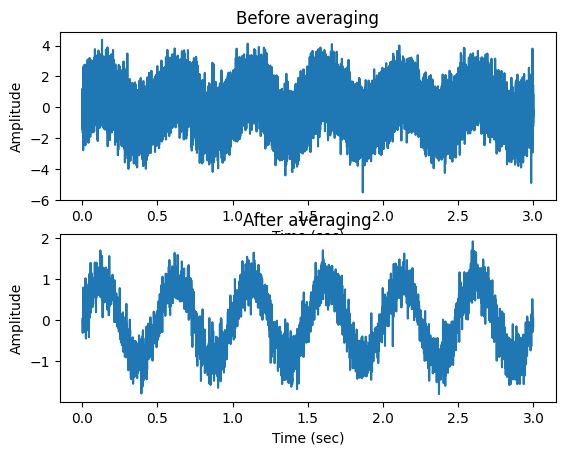

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 10000 # Hz
t = np.arange(0, 3, 1/Fs)

x = np.sin(t * 2 * np.pi * 2)

noise = np.random.randn(len(x))

noisySignal = x + noise

N = 10 # how many points to average
smooth_signal = np.zeros(int(np.ceil(len(noisySignal) / N)))
for i in range(0, len(noisySignal), N):
  #print(i)
  smooth_signal[i//N] = np.mean(noisySignal[i:i+N])
  #print(i//N)

plt.figure()
plt.subplot(2,1,1)
plt.plot(t, noisySignal)
plt.xlabel('Time (sec)'); plt.ylabel('Amplitude')
plt.title('Before averaging')

t_smooth = np.arange(0, 3, N/Fs)
plt.subplot(2,1,2)
plt.plot(t_smooth, smooth_signal)
plt.title('After averaging')
plt.xlabel('Time (sec)'); plt.ylabel('Amplitude')
plt.show()

#fig.tight_layout()

# Create noisy signal

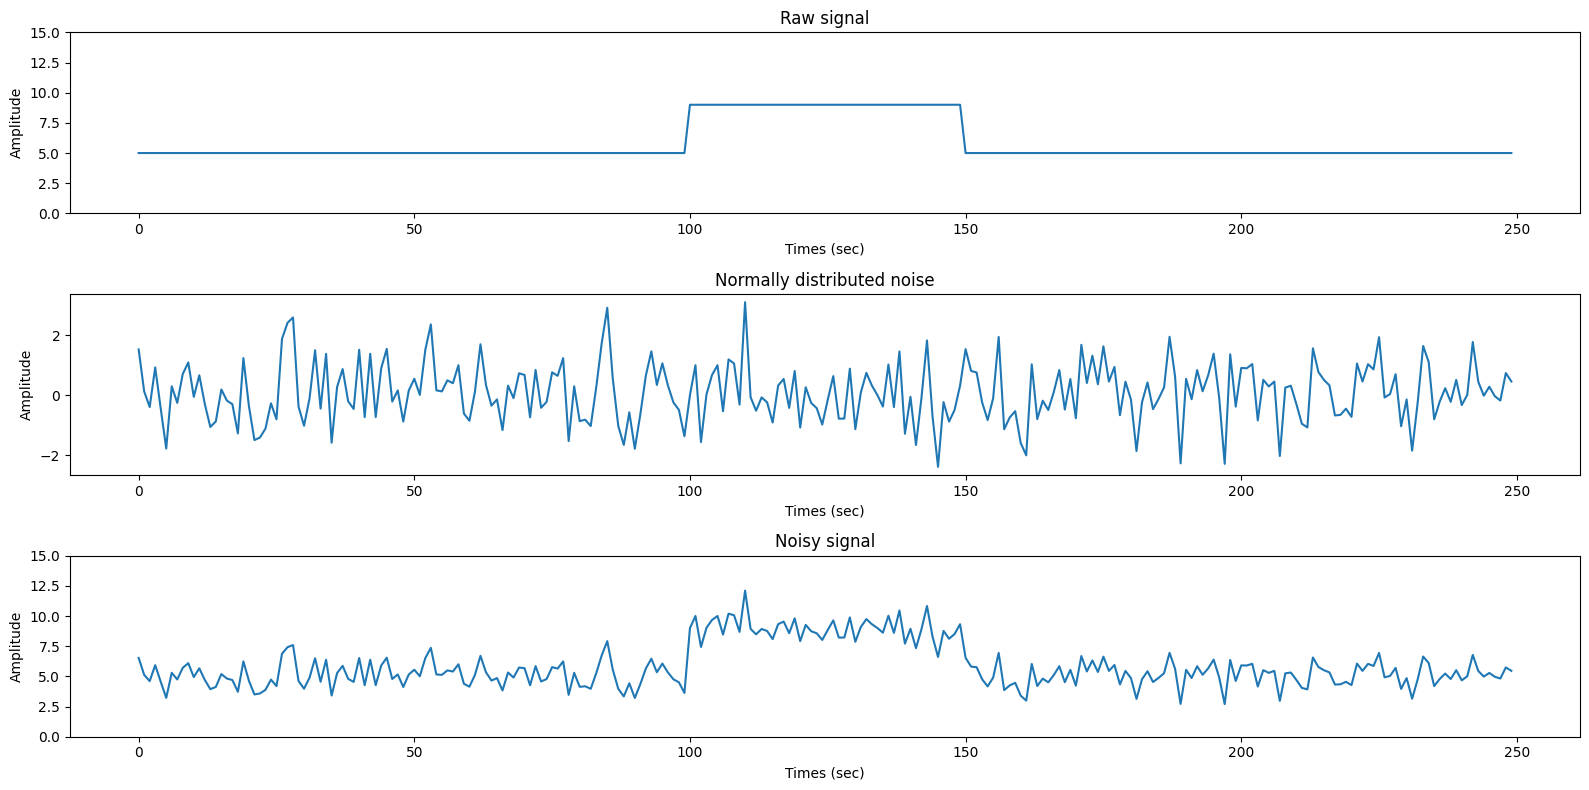

In [2]:
# create vectors of zeros and 4s (pulse)
zeros = np.zeros((100))
pulse = 4*np.ones((50))
#pad the pulse with zeros from both sides using concatenate
y = np.concatenate((zeros, pulse, zeros))+5

# create the time vector of same length
t = np.arange(0, np.size(y), 1)

# generate randon noise (normally distributed)
noise = np.random.randn(np.size(y))
# add noise to the generated pulse signal
noisySignal = y + noise

fig, (ax) = plt.subplots(nrows = 3, ncols = 1, figsize=(16, 8))

ax[0].plot(t, y)
ax[0].set(title="Raw signal", xlabel="Times (sec)", ylabel = "Amplitude")
ax[0].set_ylim((0, 15))

ax[1].plot(t, noise)
ax[1].set(title="Normally distributed noise", xlabel="Times (sec)", ylabel = "Amplitude")

ax[2].plot(t, noisySignal)
ax[2].set(title="Noisy signal", xlabel="Times (sec)", ylabel = "Amplitude")
ax[2].set_ylim((0, 15))


fig.tight_layout()

# Avreging over trials (repetirions of the same signal)

In [ ]:

def Generate_and_averaging_over_trials(signal, n):
    regenerated_signals = np.empty((n, signal.size))
    for i in range(n):
        regenerated_signals[i,:] = signal + np.random.normal(0, 1, signal.size)
    return np.mean(regenerated_signals, axis=0)

In [ ]:
numOfTrials=10
ave_over_trial_y = Generate_and_averaging_over_trials(y, numOfTrials)

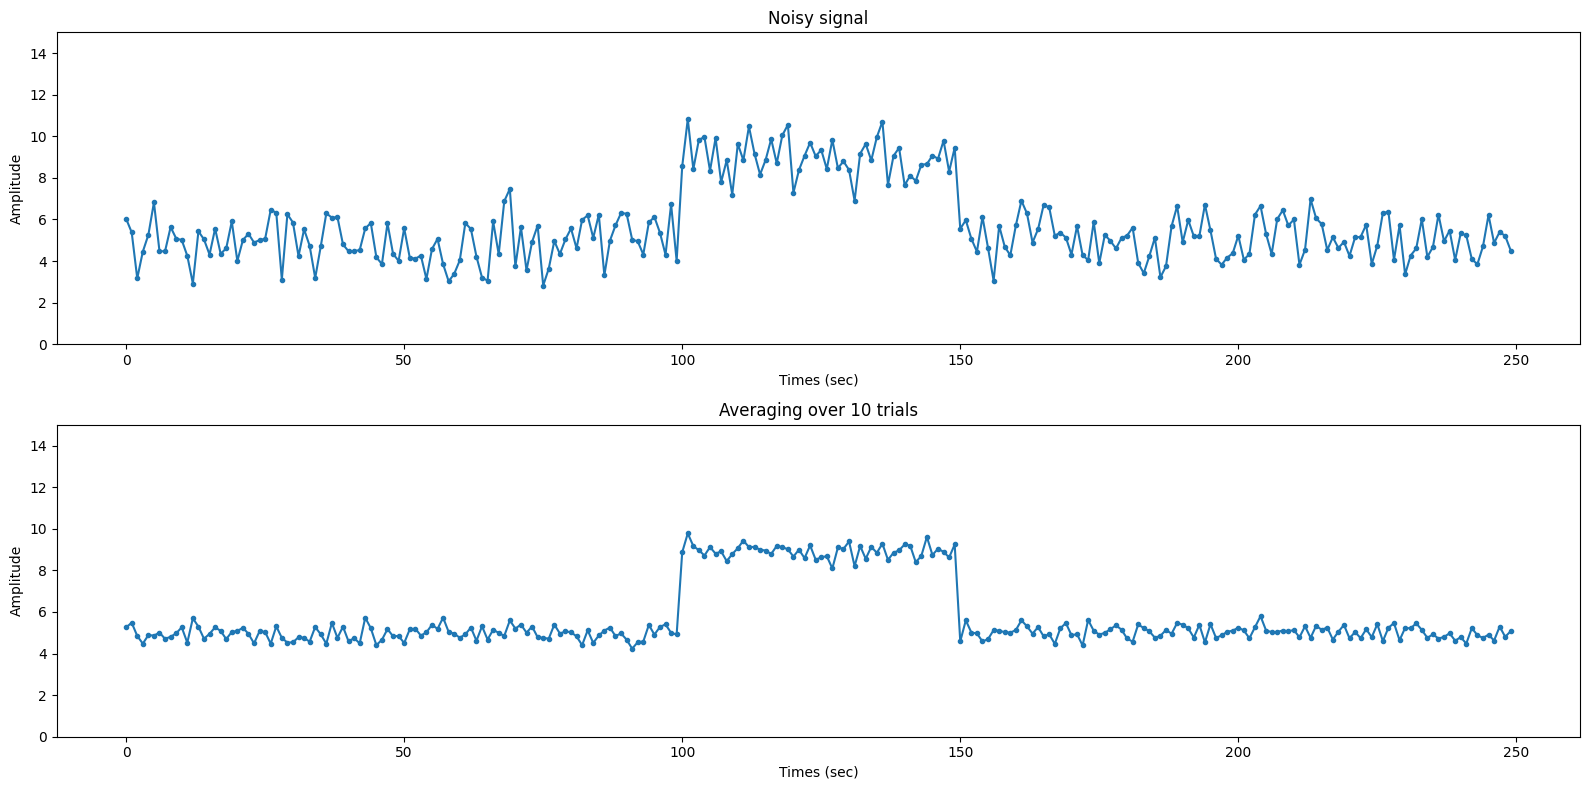

In [ ]:
# Plot the original and resampled signals
fig, (ax) = plt.subplots(nrows = 2, ncols = 1, figsize=(16, 8))


ax[0].plot(t, noisySignal,'.-')
ax[0].set(title="Noisy signal", xlabel="Times (sec)", ylabel = "Amplitude")
ax[0].set_ylim((0, 15))


ax[1].plot(ave_over_trial_y,'.-')
ax[1].set(title= f"Averaging over {numOfTrials} trials", xlabel="Times (sec)", ylabel = "Amplitude")
ax[1].set_ylim((0, 15))

fig.tight_layout()

#Rectangle smoothing

rectangle smoothing of size 5: [0.2 0.2 0.2 0.2 0.2]


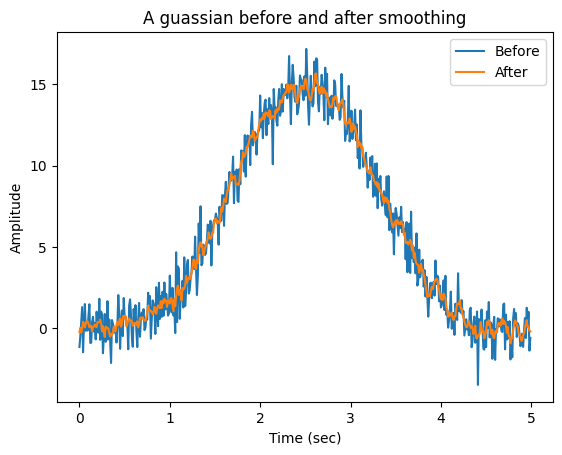

In [ ]:

t = np.arange(0, 5, 0.01)
y = 15 * (np.array(np.hanning(len(t))) ** 2)
noise = np.random.randn(len(y))
y += noise

# create the rectangle window for smoothing
rectLength5 = 5

# creat smooth rectangle
rect5 = np.ones(rectLength5)
# ALWAYS remember to normalize it
rect5 = rect5 / np.sum(rect5)

# Smooth the signal using the concolve function
y_rect_smoothed5 = np.convolve(y, rect5, mode='same')

print(f'rectangle smoothing of size 5: {rect5}')

#PLOT
plt.plot(t, y)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')


plt.plot(t, y_rect_smoothed5)

plt.title('A guassian before and after smoothing')
plt.legend(['Before', 'After'])
plt.show()

#Triangle smoothing

In [ ]:


triangle = np.concatenate((np.arange(1, degree), np.arange(degree, 0, -1)))
# np.arange(1, degree),np.arange(degree, 0, -1)
triangleSum = np.sum(triangle)
triangle = triangle/triangleSum
triangle

NameError: ignored

In [ ]:
degree = 3
rectLength = np.size(degree)

rect = np.ones(rectLength) / rectLength
rect


In [ ]:
y_triangle_smoothed = np.convolve(y, triangle, mode='same')

y_rect_smoothed = np.convolve(y, rect, mode='same')



plt.plot(t, y_triangle_smoothed)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')


plt.plot(t, y_rect_smoothed)

plt.title('A guassian before and after smoothing')
plt.legend(['triangle_smoothed', 'Rectangle_smoothed5'])
plt.show()

NameError: ignored

In [ ]:
k = np.array([-1,1])
# create vectors of zeros and 4s (pulse)
zeros = np.zeros((10))
pulse = np.ones((2))
#pad the pulse with zeros from both sides using concatenate
y = np.concatenate((zeros, pulse, zeros,zeros, pulse, zeros,))
cc = np.correlate(y,k, "full")
k,y,cc

(array([-1,  1]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., -1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., -1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]))

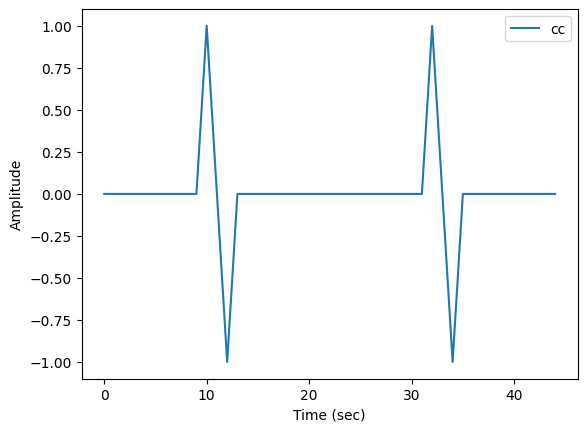

In [ ]:
plt.plot(np.arange(0, len(cc)), cc)

#plt.plot(np.arange(0, len(y)), y)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(["cc","pulse"])
